## Lab Weeek4


## <font color=#0A1172>3. Create a trend graph showing the bigram and word trend of “climate change”, “global warming”, “wars” and 3 others of your choices</font>  

In [4]:
import pandas as pd
from collections import Counter
import numpy as np
import nltk
stopwords = set(nltk.corpus.stopwords.words('english'))

In [5]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
def ngrams(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [15]:
un = pd.read_csv('un-general-debates-blueprint.csv.gz')
un['tokens'] = un['text'].apply(prepare, pipeline=pipeline)
un['bigram'] = un['tokens'].apply(ngrams, 2)
keywords=['climate change','global warming','wars','weapons','island developing','united nations']

In [45]:
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]
def count_keywords_by(un, by, keywords, column=['bigram','tokens']):
    freq_matrix = un['bigram'].apply(count_keywords, keywords=keywords)
    freq_df1 = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df1[by] = un[by]
    freq_matrix = un['tokens'].apply(count_keywords, keywords=keywords)
    freq_df2 = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df2[by] = un[by]
    freq_df = freq_df1.append(freq_df2)
    return freq_df.groupby(by).sum().sort_values(by)

In [46]:
freq_df = count_keywords_by(un, by='year', keywords=keywords)

<AxesSubplot:xlabel='year'>

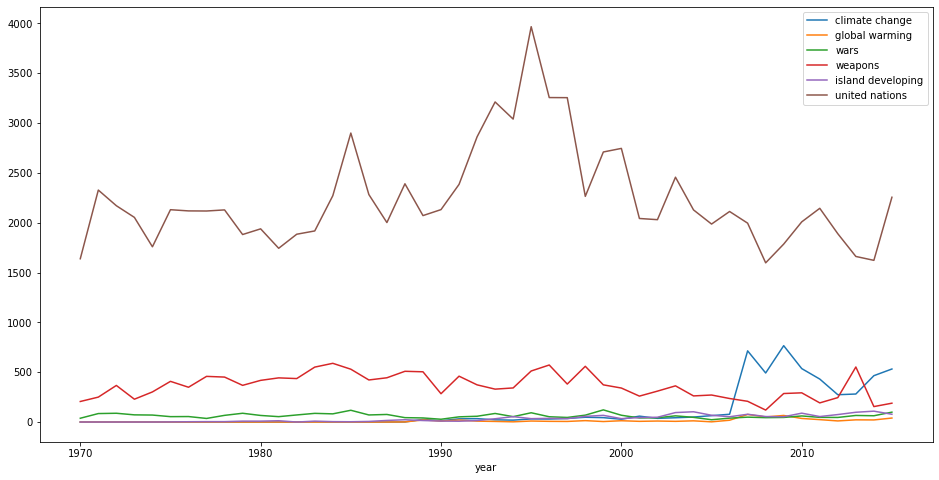

In [47]:
freq_df.plot(kind='line', figsize=(16,8))